Thanks to https://seaborn.pydata.org/tutorial.html

In [2]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics")))  # seed for numpy's random number generator, not seaborn related

# Tweaking matplotlib

Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it’s nice to have **plots that are pleasant to look at**. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention and draw a viewer in.

**Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.**

Let’s define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters we can tweak.

In [3]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

This is what the plot looks like with matplotlib defaults:

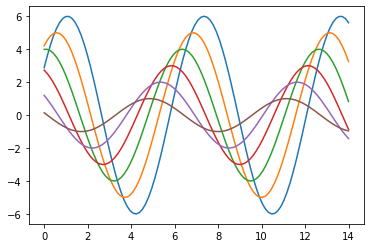

In [4]:
sinplot()

There are lots of preset themes. They are each suited to different applications and personal preferences. The default theme is darkgrid. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The whitegrid theme is similar, but it is better suited to plots with heavy data elements.

For many plots, (especially for settings like talks, where you primarily want to use figures to provide impressions of patterns in the data), the grid is less necessary.

In [5]:
plt.style.available

['dark_background',
 'seaborn-pastel',
 'Solarize_Light2',
 'bmh',
 'seaborn-whitegrid',
 'seaborn-ticks',
 'fast',
 'seaborn-colorblind',
 'tableau-colorblind10',
 'fivethirtyeight',
 '_classic_test',
 'seaborn-talk',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-white',
 'seaborn-paper',
 'seaborn-dark',
 'classic',
 'seaborn-deep',
 'grayscale',
 'seaborn-bright',
 'seaborn',
 'seaborn-darkgrid',
 'ggplot',
 'seaborn-dark-palette']

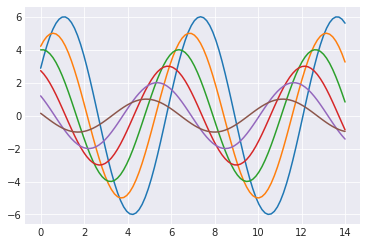

In [20]:
with plt.style.context('seaborn-darkgrid'):  # CHECK THEM ALL
    sinplot()

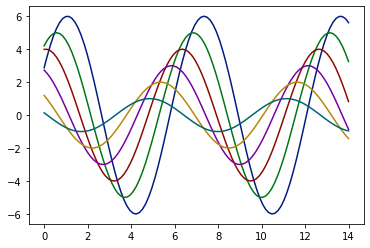

In [19]:
with plt.style.context('seaborn-paper'): # seaborn-paper seaborn-notebook seaborn-talk seaborn-poster
    sinplot()

## Seaborn plots

In [27]:
import seaborn as sns

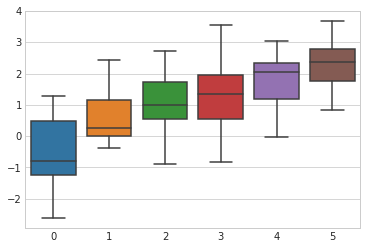

In [28]:
with plt.style.context('seaborn-whitegrid'):
    data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
    # print(data)
    sns.boxplot(data=data)

## Removing spines with despine()

Both the white and ticks styles can benefit from removing the top and right axes spines, which are not needed. It’s impossible to do this through the matplotlib parameters, but you can call the seaborn function despine() to remove them:

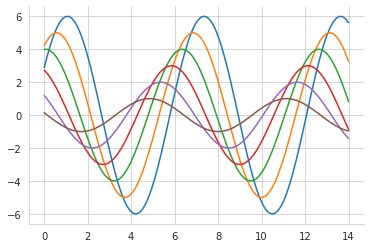

In [29]:
sinplot()
sns.despine()

When the ticks don’t cover the whole range of the axis, the trim parameter will limit the range of the surviving spines.

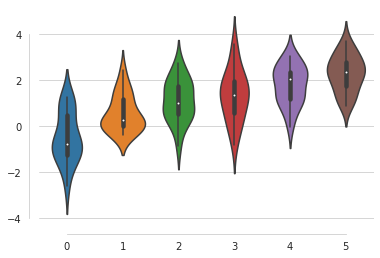

In [30]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

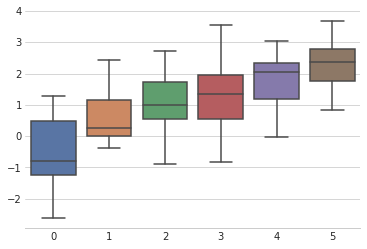

In [31]:
with plt.style.context('seaborn-whitegrid'):
    sns.boxplot(data=data, palette="deep")
    sns.despine(left=True)

## Temporarily setting figure style

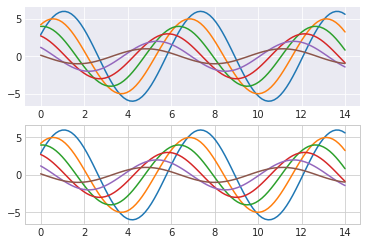

In [33]:
with plt.style.context('seaborn-darkgrid'):
    plt.subplot(211)
    sinplot()
with plt.style.context('seaborn-whitegrid'):
    plt.subplot(212)
    sinplot()

## Overriding elements of the seaborn styles with set_style()

In [36]:
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

## Scaling plot elements with plotting_context() and set_context()

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

First let’s reset the default parameters by calling set():

In [37]:
sns.set()

The four preset contexts, in order of relative size, are **paper, notebook, talk, and poster**. The notebook style is the default, and was used in the plots above.

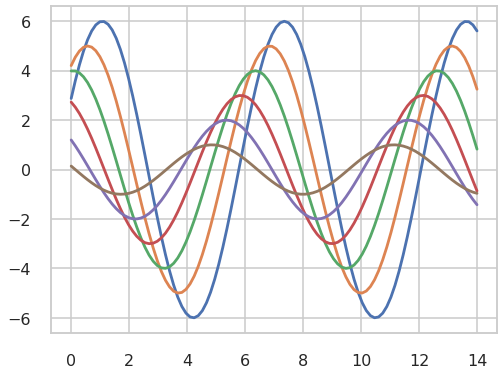

In [41]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(8, 6))
    sinplot()

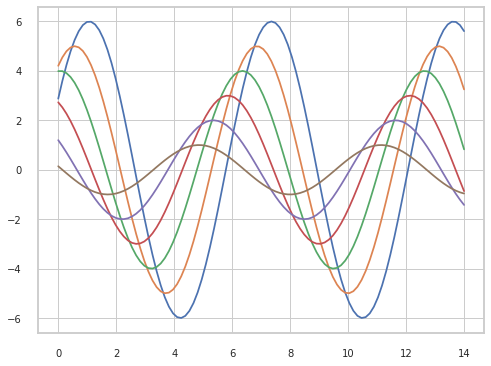

In [42]:
with plt.style.context('seaborn-notebook'):
    plt.figure(figsize=(8, 6))
    sinplot()

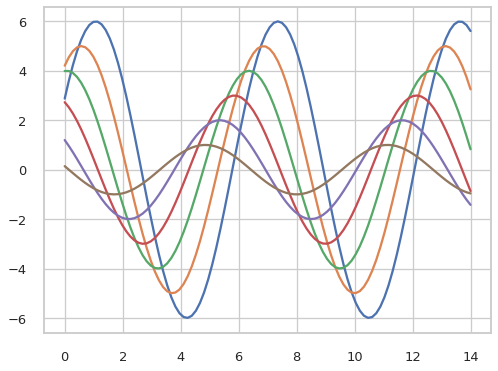

In [43]:
with plt.style.context('seaborn-talk'):
    plt.figure(figsize=(8, 6))
    sinplot()

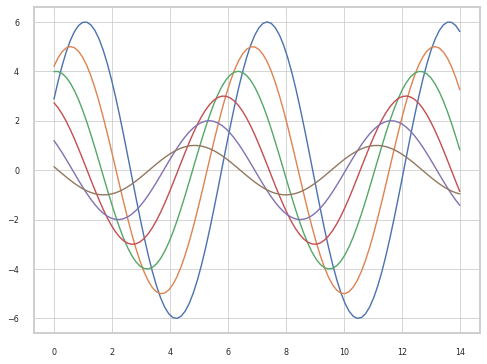

In [44]:
with plt.style.context('seaborn-paper'):
    plt.figure(figsize=(8, 6))
    sinplot()

You can call set_context() with one of these names to set the parameters, and you can override the parameters by providing a dictionary of parameter values.

You can also independently scale the size of the font elements when changing the context. (This option is also available through the top-level set() function).

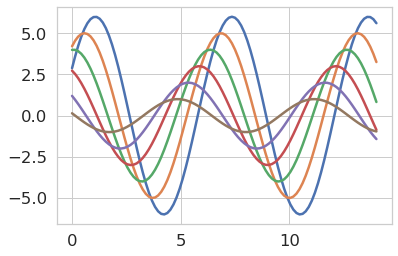

In [45]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

In [46]:
sns.set() # Use defalt

# Color palettes

## Qualitative color palettes

Qualitative (or categorical) palettes are best when you want to distinguish discrete chunks of data that do not have an inherent ordering.

When importing seaborn, the default color cycle is changed to a set of six colors that evoke the standard matplotlib color cycle while aiming to be a bit more pleasing to look at.

There are six variations of the default theme, called deep, muted, pastel, bright, dark, and colorblind.

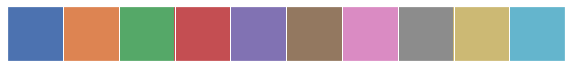

In [47]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

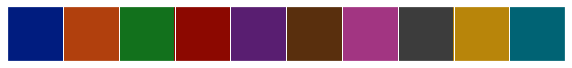

In [48]:
sns.palplot(sns.color_palette("dark", 10))

And there are other palettes: circular, brewer, sequential, or you can name colors:

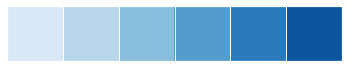

In [49]:
sns.palplot(sns.color_palette("Blues"))

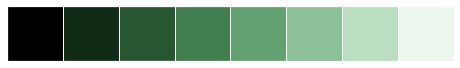

In [50]:
sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))

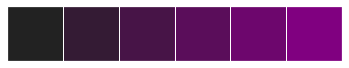

In [51]:
sns.palplot(sns.dark_palette("purple"))

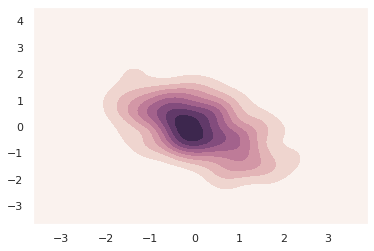

In [52]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

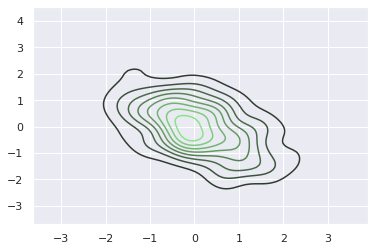

In [53]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x, y, cmap=pal);

## Changing palettes with set_palette()

In [54]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

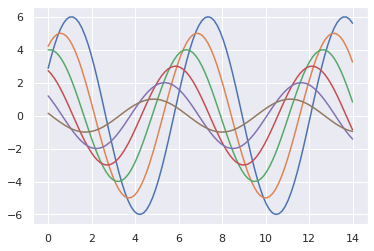

In [55]:
sinplot()

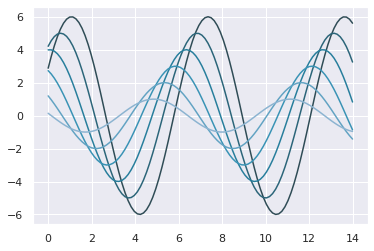

In [56]:
with sns.color_palette("PuBuGn_d"):
    sinplot()

# Seaborn tutorial: http://seaborn.pydata.org/tutorial